# **FOREST-FIRE PREDICTION**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img=cv2.imread("/content/pic.png")

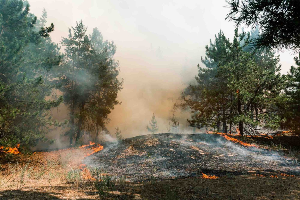

In [ ]:
# cv2_imshow(img)
img1=cv2.resize(img,(300,200))
cv2_imshow(img1)

In [ ]:
import pandas as pd

In [ ]:
#loading forestfires dataset to the pandas dataframe
df=pd.read_csv('/content/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
# Attribute Information:

# X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
# month - month of the year: 'jan' to 'dec'
# day - day of the week: 'mon' to 'sun'
# FFMC - FFMC index from the FWI system: 18.7 to 96.20
# DMC - DMC index from the FWI system: 1.1 to 291.3
# DC - DC index from the FWI system: 7.9 to 860.6
# ISI - ISI index from the FWI system: 0.0 to 56.10
# temp - temperature in Celsius degrees: 2.2 to 33.30
# RH - relative humidity in %: 15.0 to 100
# wind - wind speed in km/h: 0.40 to 9.40
# rain - outside rain in mm/m2 : 0.0 to 6.4
# area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [ ]:
#renaming the x and y attribute to A & B for clear understanding
df = df.rename(columns={'X': 'A','Y':'B'})
df

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
df.shape

(517, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       517 non-null    int64  
 1   B       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.isnull().sum()

A        0
B        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.size

6721

In [ ]:
#changing days into numeric quantity because machine learning model deals with numbers
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

#changing month into numeric quantity
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

#showing first 10 instances of dataset after converting days and months into numbers
df.head(15) 

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
df.describe().T
#generate descriptive statistics of each attribute

,count,mean,std,min,25%,50%,75%,max
A,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
B,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


In [ ]:
#given area of land burnt, but we have to predict if there is fire or not so changing values of area to 0 and 1 only
#here 0 represet there is not fire and 1 represent fire, changing all values of area which are greater than 0 to 1
df['area'].values[df['area'].values > 0] = 1
df

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [ ]:
import numpy as np
np.unique(df['area'],return_counts=True)

(array([0., 1.]), array([247, 270]))

In [ ]:
df['area'].value_counts()

1.0    270
0.0    247
Name: area, dtype: int64

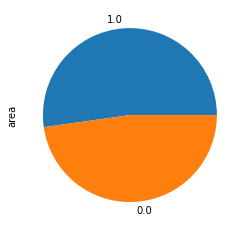

In [ ]:
df['area'].value_counts().plot(kind='pie')

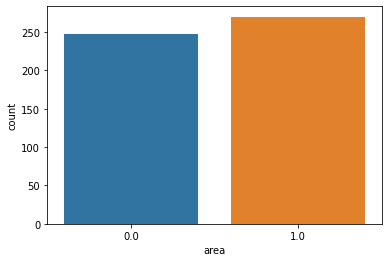

In [ ]:
import seaborn as sns
sns.countplot(x='area',data=df)

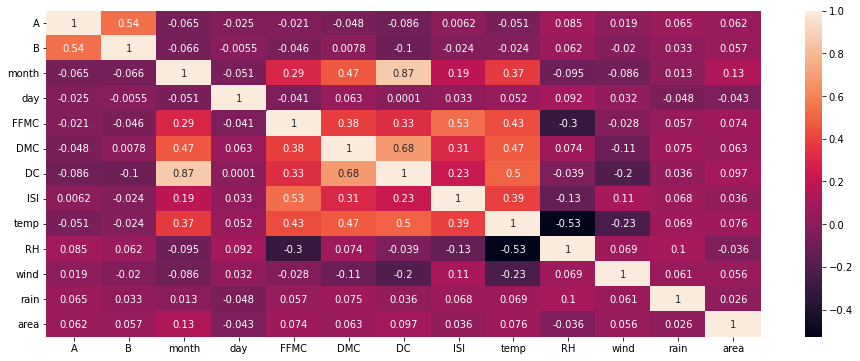

In [ ]:
corr_mat=df.corr()
fig=plt.figure(figsize=(16,6))
sns.heatmap(corr_mat,annot=True)

In [ ]:
import numpy as np
np.unique(df['area'],return_counts=True)

(array([0., 1.]), array([247, 270]))

In [ ]:
#sorting to see which attribute is correlated more to attribut "area" 
df.corr()['area'].sort_values()
#we can see that attribute "month" is the mostly correlated  to attribute "area"

day     -0.042970
RH      -0.035587
rain     0.025550
ISI      0.035663
wind     0.055702
B        0.056892
A        0.062491
DMC      0.062672
FFMC     0.073823
temp     0.076047
DC       0.096724
month    0.130329
area     1.000000
Name: area, dtype: float64

## DATA ANALYSIS

Plot and show a scatter plot using matplotlib.pyplot illustrating te relationship b/w DMC and FFMC


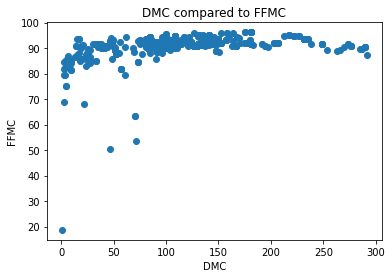

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df.DMC,y=df.FFMC)
plt.xlabel("DMC")
plt.ylabel("FFMC")
plt.title("DMC compared to FFMC")

plt.show()

=> Plot and show a bar graph of how many fires have occured on each day

Text(0.5, 1.0, 'occurance of fires by weekday')

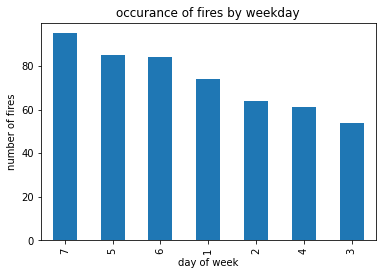

In [ ]:
df['day'].value_counts().plot(kind='bar')
plt.xlabel("day of week")
plt.ylabel("number of fires")
plt.title("occurance of fires by weekday")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'temperature')

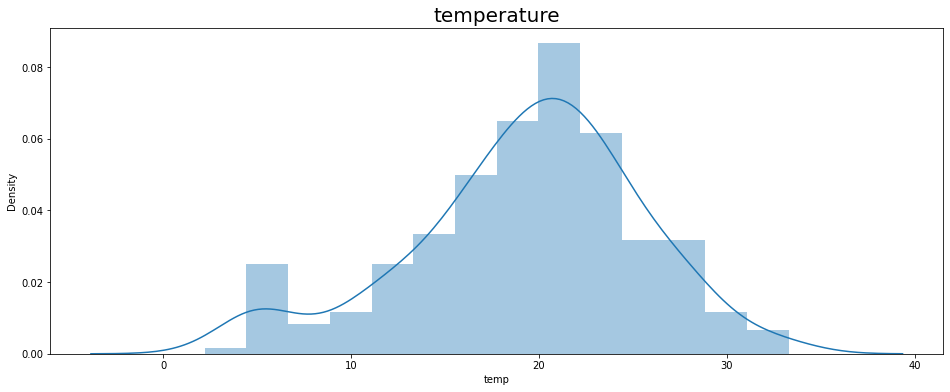

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# temp for fire (df means fire)
fig=plt.figure(figsize=(16,6))
sns.distplot(df['temp'][df['area']==1])  #fired area
plt.title("temperature",fontsize=20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'area fired or not fired')

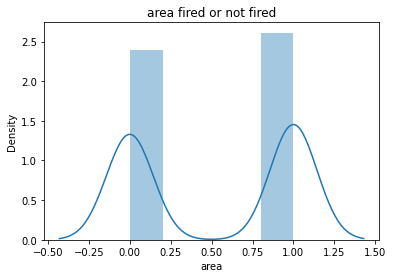

In [ ]:
sns.distplot(df['area'])
plt.title("area fired or not fired")

In [ ]:
df.groupby('area').mean()

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
area,,,,,,,,,,,,
0.0,4.518219,4.226721,7.165992,4.352227,90.219028,106.679757,522.878138,8.851822,18.427935,44.894737,3.913360,0.013765
1.0,4.807407,4.366667,7.759259,4.174074,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889


In [ ]:
x=df.iloc[:,:12]
x

,A,B,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [ ]:
x=df.iloc[:,:12].values
x

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [ ]:
x.ndim

2

In [ ]:
y=df.iloc[:,-1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
512    1.0
513    1.0
514    1.0
515    0.0
516    0.0
Name: area, Length: 517, dtype: float64

In [ ]:
y=df.iloc[:,-1].values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
y.ndim

1

## Test Train and Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.35)

In [ ]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

(336, 12)
(181, 12)
(336,)
(181,)


In [ ]:
import numpy as np

In [ ]:
np.round(np.sqrt(517))

23.0

## MODEL1 :USING KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=23)


In [ ]:
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
y_pred1=model1.predict(x_test)
y_pred1

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.])

In [ ]:
y_test

array([1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.5248618784530387

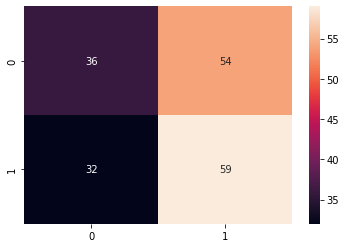

In [ ]:
from sklearn.metrics import confusion_matrix 
conf=confusion_matrix(y_test,y_pred1)
sns.heatmap(conf,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.5248618784530387

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred1))
print("Precision:",metrics.precision_score(y_test,y_pred1))
print("Recall:",metrics.recall_score(y_test,y_pred1))

Accuracy: 0.5248618784530387
Precision: 0.5221238938053098
Recall: 0.6483516483516484


In [ ]:
#prediction using knn
classes={0:'safe',1:'On Fire'}
x_new=[[10,4,7,0,0,0,0,6,9,0,0,0]]
y_pred1=model1.predict(x_new)
print(classes[y_pred1[0]])

safe


## MODEL2 : SVM  support vector machine

In [ ]:
from sklearn.svm import SVC
model2=SVC()

In [ ]:
model2.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2=model1.predict(x_test)
y_pred2

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.])

In [ ]:
y_test

array([1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.5248618784530387

In [ ]:
#prediction using svm
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=model2.predict(x_new)
print(classes[y_pred2[0]])

On Fire


## MODEL3 : Logistic Regression

In [ ]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()

In [ ]:
model3.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred3=model3.predict(x_test)
y_pred3

array([0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.])

In [ ]:
y_test

array([1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.5580110497237569

In [ ]:
df['area'][2]

0.0

In [ ]:
#prediction using logistic regression
class_label={1:'There is Fire',0:'There is no fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]


y_predict=model3.predict(x_new)
print(class_label[y_pred3[0]])

There is no fire
